IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Ahmed SAOUDAT, Yahiathen ABBACHE*

## Préparation

Décompresser l'archive, elle crée le répertoire "tp9" qui contient :
- un fichier ipython à ouvrir (ce fichier-ci)
- un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance
- un sous-répertoire "IADS2018" (qui contient 2 fichiers python) dont l'utilisation est détaillée un peu plus loin dans ce fichier ipython.

Le but de ce TP est de compléter ce document ipython en ajoutant les fonctions demandées. Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles 


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

### Chargement du fichier "base_2D.csv"

In [2]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Construction d'un package de fonctions

Dans un premier temps, afin de pouvoir utiliser toutes les fonctions écrites dans le TP précédent (fonctions pour les K-moyennes), vous allez réaliser un package de fonctions qui s'appelle "<tt>IADS2018</tt>".

Le package <tt>IADS2018</tt> est composé ainsi :
- c'est un répertoire dont le nom est <tt>IADS2018</tt>
- ce répertoire contient le fichier <tt>\__init\__.py</tt> qui, dans notre cas, est un fichier vide (mais il est important que ce fichier existe !)
- ce répertoire contient le fichier <<tt>kmoyennes.py</tt> qui est le fichier dans lequel vous devez mettre toutes les fonctions écrites lors du TP précédent sur les K-moyennes.

<font size="+1" color="RED">**[Q]**</font> En utilisant votre éditeur de texte préféré (emacs, gedit, vim,...) ouvrir le fichier <tt>kmoyennes.py</tt> qui se trouve dans le sous-répertoire <tt>IADS2018</tt> et compléter-le en reprenant les fonctions que vous avez écrites dans la séance précédente.

Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en utilisant une commande d'importation:

In [3]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
import IADS2018 
import IADS2018.kmoyennes as km

#### Vérification que tout fonctionne bien

Si la recopie de toutes vos fonctions s'est bien déroulée, une fois l'importation faite il est possible de tester les instructions des boites suivantes:

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


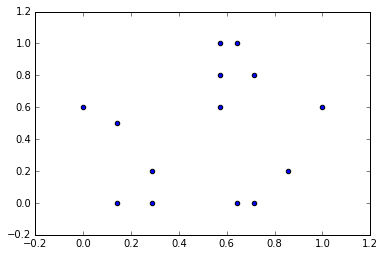

In [4]:
# Affichage des points après normalisation:

DataFnorm = km.normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

Iteration  1 	Inertie:  1.2269727891156463 	Difference:  1.2269727891156463
Iteration  2 	Inertie:  1.1791904761904763 	Difference:  0.04778231292516999


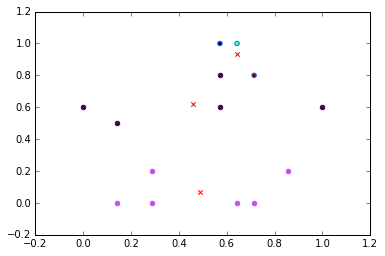

In [52]:
les_centres, l_affectation = km.kmoyennes(3, DataFnorm, 0.05, 100)

km.affiche_resultat(DataFnorm,les_centres,l_affectation)

## Travail à réaliser

On peut reprendre les fonctions écrites dans les tp sur l'apprentissage supervisé pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

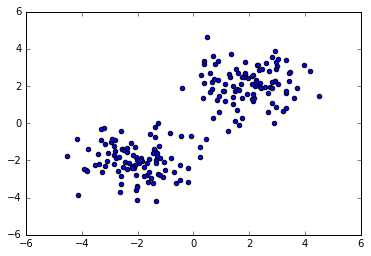

In [53]:
def createGaussianDataset(group1_center,group2_center,sigma,nb_points):
        group1 = np.random.multivariate_normal(group1_center,sigma,nb_points)
        group2 = np.random.multivariate_normal(group2_center,sigma,nb_points)
        
        return np.concatenate((group1, group2))

# Utilisation de cette fonction :
the_set = createGaussianDataset(np.array([2,2]),np.array([-2,-2]),np.array([[1.1,0],[0,1.1]]),100)

# Affichage des points obtenus
data_random = pd.DataFrame(the_set, columns = ['X', 'Y'])
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

Iteration  1 	Inertie:  9.064625892609609 	Difference:  9.064625892609609
Iteration  2 	Inertie:  4.090699025920061 	Difference:  4.973926866689548
Iteration  3 	Inertie:  4.080025287653312 	Difference:  0.010673738266748778


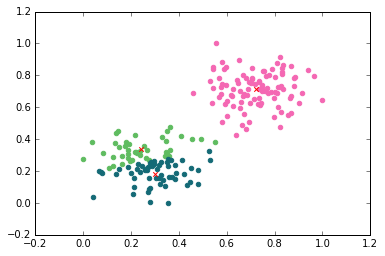

In [54]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  1 	Inertie:  4.077260846966841 	Difference:  4.077260846966841
Iteration  2 	Inertie:  4.031852043221087 	Difference:  0.04540880374575451


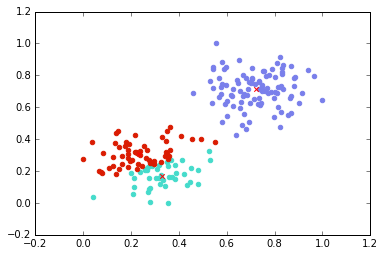

In [55]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  1 	Inertie:  4.752202869486666 	Difference:  4.752202869486666
Iteration  2 	Inertie:  4.752202869486666 	Difference:  0.0


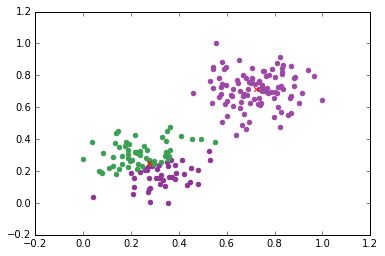

In [56]:
les_centresRand1, l_affectationv = km.kmoyennes(2, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  1 	Inertie:  11.421064508124305 	Difference:  11.421064508124305
Iteration  2 	Inertie:  3.2182207763285726 	Difference:  8.202843731795731
Iteration  3 	Inertie:  2.836337422752891 	Difference:  0.3818833535756818
Iteration  4 	Inertie:  2.634704982647022 	Difference:  0.20163244010586867
Iteration  5 	Inertie:  2.585536512902052 	Difference:  0.04916846974496991


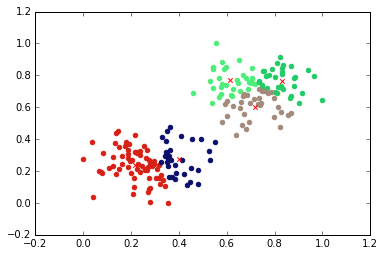

In [57]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  1 	Inertie:  3.3796506764926586 	Difference:  3.3796506764926586
Iteration  2 	Inertie:  3.233388418460108 	Difference:  0.14626225803255055
Iteration  3 	Inertie:  3.1491629729067254 	Difference:  0.08422544555338263
Iteration  4 	Inertie:  3.097568193681646 	Difference:  0.05159477922507927
Iteration  5 	Inertie:  3.05492122489382 	Difference:  0.04264696878782637


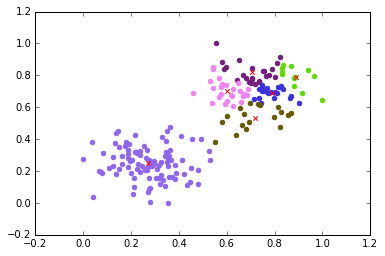

In [58]:
les_centresRand2, l_affectationRand2 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand2,l_affectationRand2)

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [59]:
# renvoie la distance maximale entre deux exemples du cluster
def dist_intracluster(df):
    d_max = 0
    for i in range(df.shape[0]):
        for j in range(df.shape[0]):
            d = km.dist_vect(df.iloc[i], df.iloc[j])
        if d > d_max:
            d_max = d
    return d_max

In [60]:
# Avec les données jouet:
for k in range(0,len(l_affectation)):
    DF = DataFnorm.iloc[l_affectation[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 0.6765714285714287	distance = 1.0
pour 1 : inertie = 0.03687074829931973	distance = 0.2457807219155036
pour 2 : inertie = 0.46574829931972794	distance = 0.7417574277569811


In [61]:
# Avec les données générées aléatoirement:
for k in range(0,len(l_affectation)):
    DF = DataRandom.iloc[l_affectationRand2[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 0.21688786367823648	distance = 0.2484289467323992
pour 1 : inertie = 0.07452593440133708	distance = 0.13024215811243212
pour 2 : inertie = 0.08550159046977283	distance = 0.18280618536138923


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [73]:
def global_intraclusters(df, affectation):
    dist_intra = []
    for i in affectation.values():
        dist_intra.append(dist_intracluster(df.iloc[i]))
    return max(dist_intra)

In [74]:
# Exemples:
print("Données jouet: "+str(global_intraclusters(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(global_intraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertie_globale(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertie_globale(DataRandom,l_affectationRand2)))


Données jouet: 1.0
Données aléatoire: 0.36872200200429667
Avec l'inertie :
Données jouet: 1.1791904761904763
Données aléatoire: 3.05492122489382


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [94]:
def sep_clusters(df_centres):
    d_min = 1 #données normalisés donc <= 1
    size = df_centres.shape[0]
    for i in range(size):
        for j in range(size):
            if i != j:
                d = km.dist_vect(df_centres.iloc[i], df_centres.iloc[j])
                if d < d_min:
                    d_min = d
    return d_min

In [95]:
# Avec les données jouet:
print("Séparabilité: "+str(sep_clusters(les_centres)))


Séparabilité: 0.3642356019064379


In [96]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sep_clusters(les_centresRand2)))


Séparabilité: 0.137567183494008


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [102]:
def evaluation(index, df, centres, affectation):
    if index == "Dunn":
        return global_intraclusters(df, affectation)/sep_clusters(centres)
    elif index == "XB":
        return km.inertie_globale(df, affectation)/sep_clusters(centres)
    else:
        print ("Mauvaise valeur pour index")

In [103]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",DataFnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",DataFnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand2,l_affectationRand2)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand2,l_affectationRand2)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand1,l_affectationRand1)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand1,l_affectationRand1)))


Pour les données jouet:
	Dunn:	2.7454757161736003
	XB:	3.237438817124137
Pour les données aléatoires (6 clusters):
	Dunn:	2.6803049436594524
	XB:	22.20675852556713
Pour les données aléatoires (5 clusters):
	Dunn:	1.9537235655413434
	XB:	13.514499625927364


## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

In [108]:
def determination_k(df, type_index, epsilon, max_iter):
    k_index = []
    for k in range(2, 10):
        centers, affecatations = km.kmoyennes(k, df, epsilon, max_iter)
        index = evaluation(type_index, df, centers, affecatations)
        k_index.append((k, index))
    k_index.sort(key=lambda tup: tup[1])
    return k_index[0][0]
determination_k(DataRandom, "Dunn", 0.05, 100)

Iteration  1 	Inertie:  4.752202869486666 	Difference:  4.752202869486666
Iteration  2 	Inertie:  4.752202869486666 	Difference:  0.0
Iteration  1 	Inertie:  4.687875985590856 	Difference:  4.687875985590856
Iteration  2 	Inertie:  4.052405322912263 	Difference:  0.6354706626785926
Iteration  3 	Inertie:  3.9978746123557287 	Difference:  0.05453071055653469
Iteration  4 	Inertie:  3.9677977632028227 	Difference:  0.030076849152905982
Iteration  1 	Inertie:  3.710290849599276 	Difference:  3.710290849599276
Iteration  2 	Inertie:  3.5507341117992013 	Difference:  0.15955673780007462
Iteration  3 	Inertie:  3.475659500790447 	Difference:  0.07507461100875412
Iteration  4 	Inertie:  3.4132651305131274 	Difference:  0.062394370277319755
Iteration  5 	Inertie:  3.385838903221196 	Difference:  0.027426227291931227
Iteration  1 	Inertie:  2.838940529358953 	Difference:  2.838940529358953
Iteration  2 	Inertie:  2.7086313050378936 	Difference:  0.1303092243210595
Iteration  3 	Inertie:  2.6715

2

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/
